# Introduction

# Data Cleaning

The original data is from: https://github.com/CSSEGISandData/COVID-19. \
The dataset includes 280 countries or regions' data from 2020-01-22 to present. Although the dataset is keeping update, in this analysis we will only use the data from begin to 2022-01-31. The datas updated after this date could be used to vertify the prediction. \
Below is the code using for data cleaning.

In [1]:
import pandas as pd
import numpy as np
import qeds
import datetime

In [2]:
#Import data from csv file.
df = pd.read_csv(r'G:\UTSG\2022 Winter\ECO225\Project\dataset\csse_covid_19_data\csse_covid_19_time_series\time_series_covid19_confirmed_global.csv')
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2002/1/22,2002/2/22,2002/3/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,302569,303266,304002,304353,304656,304922,305047,305557,305959,306347


In [3]:
#Drop column that we don't need.
df.drop(['Lat', 'Long'], axis=1, inplace=True)

In [4]:
#Some of the columns' name have error, filt them and rename them.
for label in df.columns:
    if '2' in label:
        if '200' in label:
            new_label = label[3:]
            df.rename(columns={label: new_label}, inplace=True)
df

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727
1,NaN,Albania,0,0,0,0,0,0,0,0,...,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470
4,NaN,Angola,0,0,0,0,0,0,0,0,...,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,0,2,2,2,2,2,2,2,...,2171527,2187481,2203208,2218137,2233287,2263053,2275727,2286750,2295494,2304095
276,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550
277,NaN,Yemen,0,0,0,0,0,0,0,0,...,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145
278,NaN,Zambia,0,0,0,0,0,0,0,0,...,302569,303266,304002,304353,304656,304922,305047,305557,305959,306347


In [5]:
#Group table by country/region and sum the data in same date for each country/region.
all_countries = df.groupby('Country/Region').sum()

In [6]:
#Sort the data based on recent confirmed case number, from high to low.
top_10 = all_countries.sort_values('2/3/22', ascending=False).head(10)
top_10.columns.name = 'date'
top_10.T

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Turkey,Italy,Germany,Spain
date,,,,,,,,,,
1/22/20,1,0,0,0,0,0,0,0,0,0
1/23/20,1,0,0,0,0,0,0,0,0,0
1/24/20,2,0,0,2,0,0,0,0,0,0
1/25/20,2,0,0,3,0,0,0,0,0,0
1/26/20,5,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1/30/22,74424305,41302440,25360647,19178039,16582263,11547333,11526621,10925485,9846032,9779130
1/31/22,74951445,41469499,25463530,19266496,17431225,11670366,11619882,10983116,10025463,9961253
2/1/22,75350359,41630885,25634781,19681231,17544380,11795059,11722483,11116422,10236740,10039126


<AxesSubplot:xlabel='date'>

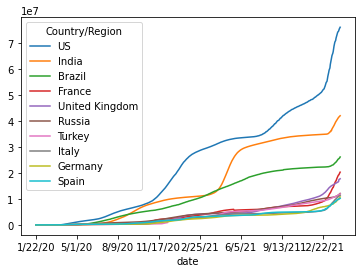

In [7]:
top_10.T.plot.line()

<AxesSubplot:xlabel='date'>

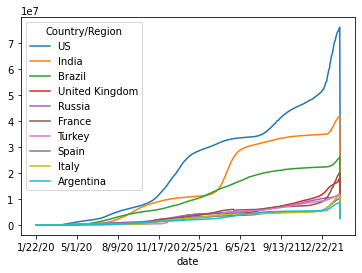

In [8]:
all_countries['per_day'] = all_countries.sum(axis=1) / all_countries.count(axis=1)
top_per_day = all_countries.sort_values('per_day', ascending=False).head(10)
top_per_day.T.plot.line()

Because there are too many countries or regions in the dataset, we only need some of them to conduct the analysis due to limited computer resources. Hence, we sour the data by the most recent confirmed case number and the average confirmed case number per day. We found that in both situation, US, India, Brazil, UK, Russia, France, Turkey, Spain, and Italy belong to the top 10. The Germany and Argentina shows in different rank method.

In [9]:
all_countries.to_period('D', axis=1)
all_countries.resample('M', axis=1, on=all_countries.columns)

TypeError: unsupported Type Index